In [2]:
#commont imports
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
df = pd.DataFrame({'client_id':[9002,6722,8799,8737,5208],
                   'sex':[1,1,1,0,0],
                   'wealth':['medium','high','high','low','medium'],
                   'age':[63,54,62,54,37]})

In [5]:
df['older_than_30'] = df.age > 30

In [7]:
type(df.nunique())

pandas.core.series.Series

In [8]:
data = pd.DataFrame({'client_id':[5392,9581,7250,8619,6573],
                   'amount':[1,1,1,0,0],
                   'date':['medium','high','high','low','medium']})

In [11]:
data.merge(df, on='client_id')

,client_id,amount,date,sex,wealth,age,older_than_30


Step 7 <a href="https://lab.karpov.courses/learning/85/module/1056/lesson/9040/26520/117846/">link</a>
<br/>💀 Сложное задание! 💀

Теперь давайте создадим собственную функцию. Напишите функцию read_n_agg, которая:

принимает на вход один параметр – путь к файлу
считывает переданный файл, в котором разделителем является ;
считает средний заработок (income) по каждой компании (company), перенося колонку company в индекс (as_index=True)
возвращает результат этих действий (агрегированный датафрэйм)

In [12]:
def read_n_agg(path_to_file):
    return pd.read_csv(path_to_file, sep=';') \
        .groupby(by='company') \
        .agg({'income':'mean'})

Step 8 <a href="https://lab.karpov.courses/learning/85/module/1056/lesson/9040/26520/117847/">link</a>
<br/>Импортируйте pandas как pd. В данном задании ссылка на датасет находится в переменной path_to_file. 
Загрузите датасет, используя ; в качестве разделителя. 

Также укажите, что столбцы start_at, end_at, arrived_at нужно прочитать как даты (параметр parse_dates).
Результат запишите в переменную taxi.

In [13]:
path_to_file = '3_taxi_peru.csv'

In [17]:
taxi = pd.read_csv(path_to_file, sep=';', parse_dates=['start_at', 'end_at', 'arrived_at'])

In [20]:
taxi.head(2)

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN


Step 9 <a href="https://lab.karpov.courses/learning/85/module/1056/lesson/9040/26520/117848/">link</a>
<br/>Проверьте, с какой платформы было сделано больше всего заказов. В ответе укажите значение в %, округлённое до целого.

In [25]:
taxi.source.value_counts(normalize=True).mul(100).round().max()

42.0

Step 10 <a href="https://lab.karpov.courses/learning/85/module/1056/lesson/9040/26520/117849/">link</a>
<br/>Чтобы показать разницу более наглядно, попробуем визуализировать показатели.

Агрегируйте данные и постройте барчарт, где по оси x будет расположено название платформы (source), а по оси y – количество заказов (абсолютные значения).

Какой график получился?

In [32]:
journey_count_by_source = taxi.groupby(by='source', as_index=False) \
    .agg({'journey_id':'count'}) \
    .rename(columns={'journey_id':'journey_count'}) \
    .sort_values('journey_count', ascending=False)

<AxesSubplot:xlabel='source', ylabel='journey_count'>

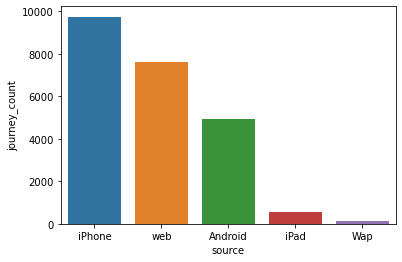

In [33]:
sns.barplot(data=journey_count_by_source, x='source', y='journey_count')

Step 11 <a href="https://lab.karpov.courses/learning/85/module/1056/lesson/9040/26520/117850/">link</a>
<br/>Альтернативный вариант построения распределения категориальной переменной – sns.countplot. В качестве единственного аргумента можно передать всего одну колонку: например, source, а количество значений для оси y функция посчитает самостоятельно.

sns.countplot(taxi['source'])

Используйте данный тип графика и проверьте, какой тип поездки (icon) встречался чаще всего.

<AxesSubplot:xlabel='icon', ylabel='count'>

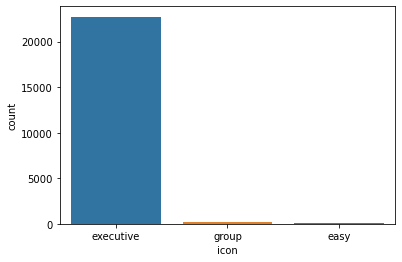

In [37]:
sns.countplot(x=taxi['icon'])

Step 12 <a href="https://lab.karpov.courses/learning/85/module/1056/lesson/9040/26520/117851/">link</a>
<br/>Теперь попробуем построить более сложный график!

С помощью sns.countplot и параметра hue визуализируйте распределение переменной end_state (итоговое состояние заказа) в разбивке по платформам (source).

Иными словами, по оси x расположите платформу, а в качестве цвета используйте состояние заказа.

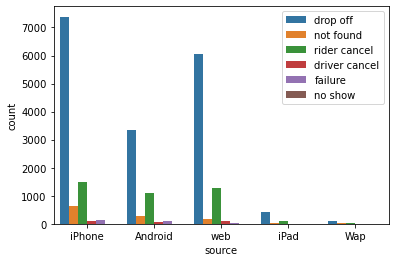

In [39]:
sns.countplot(x=taxi['source'],hue=taxi['end_state'])
plt.legend(loc='upper right')

Step 13 <a href="https://lab.karpov.courses/learning/85/module/1056/lesson/9040/26520/117852/">link</a>
<br/>Проверим, как распределены оценки водителей (driver_score). Для подготовки данных выполните следующие шаги:

Посчитайте частоту встречаемости каждой из оценок
<br/>Переведите в проценты и округлите до 2 знаков после точки (.mul(100).round(2))
<br/>Сбросьте индексы
<br/>Переименуйте колонки в driver_score и percentage
<br/>Отсортируйте по driver_score в порядке возрастания (от 0 до 5)
<br/>Запишите результат в driver_score_counts

In [58]:
driver_score_counts = taxi.driver_score \
    .value_counts(normalize=True) \
    .mul(100) \
    .round(2) \
    .reset_index() \
    .rename(columns={'index': 'driver_score', 'driver_score':'driver_percentage'}) \
    .sort_values('driver_score')

In [59]:
driver_score_counts

,driver_score,driver_percentage
2,0.0,14.30
4,1.0,1.23
5,2.0,0.81
3,3.0,2.97
1,4.0,21.88
0,5.0,58.81


Step 14 <a href="https://lab.karpov.courses/learning/85/module/1056/lesson/9040/26520/117853/">link</a>
<br/>Теперь строим график! Сначала импортируем библиотеки:
Укажите, какую из четырех строчек в нижепредставленном коде нужно исправить, чтобы получить следующий график:

<img src='https://ucarecdn.com/b25244c8-7fce-44f4-8e15-8fec88ddeb4b/'/>

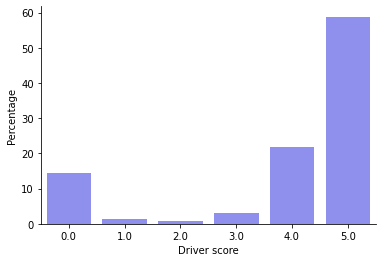

In [60]:
ax = sns.barplot(x='driver_score', y='driver_percentage', data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

Step 15 <a href="https://lab.karpov.courses/learning/85/module/1056/lesson/9040/26520/117854/">link</a>
<br/>💀 Сложное задание! 💀

Проделайте аналогичные шаги для rider_score (оценок клиентов водителями), не забыв построить график.
В чем его отличие от распределения оценок водителей?

In [55]:
rider_score_counts = taxi.rider_score \
    .value_counts(normalize=True) \
    .mul(100) \
    .round(2) \
    .reset_index() \
    .rename(columns={'index': 'rider_score', 'rider_score':'rider_percentage'}) \
    .sort_values('rider_score')

In [56]:
rider_score_counts

,rider_score,rider_percentage
2,0.0,2.29
4,1.0,0.21
5,2.0,0.19
3,3.0,1.38
1,4.0,8.83
0,5.0,87.10


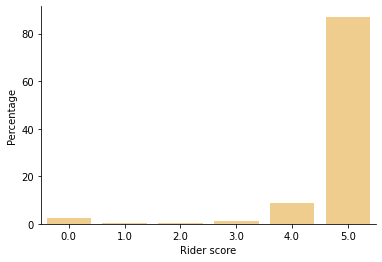

In [57]:
ax = sns.barplot(x='rider_score', y='rider_percentage', data=rider_score_counts, color='orange', alpha=0.5)
ax.set(xlabel='Rider score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()